# Experimento 1: Impacto del shuffle en el rendimiento general del sistema.

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import glob, os
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [2]:
cd = os.getcwd()
log_directory = os.path.join(os.sep.join(cd.split(os.path.sep)[:-1]), 'output', 'logs')
log_files = glob.glob(os.path.join(log_directory, "*.csv"))
df = pd.concat(pd.read_csv(file, sep = ';') for file in log_files)
df_app_ids = pd.DataFrame(df.drop_duplicates('App ID').reset_index (drop = True)[['App ID', 'App Name']])

In [4]:
group_by = df.loc[(df['Name'] == 'APPLICATION START') | (df['Name'] == 'APPLICATION END')].groupby('App ID')
execution_times = pd.DataFrame(group_by.agg({'Datetime': lambda x: list(x)})).reset_index(drop=False)
execution_times['Start'] = execution_times['Datetime'].map(lambda x: datetime.strptime(x[0], '%Y-%m-%d %H:%M:%S.%f'))
execution_times['End'] = execution_times['Datetime'].map(lambda x: datetime.strptime(x[1], '%Y-%m-%d %H:%M:%S.%f'))
execution_times['Total app execution time (s)'] = (execution_times['End'] - execution_times['Start']).apply(lambda x: x.total_seconds())
execution_times = execution_times[['App ID', 'Total app execution time (s)']]
execution_times = pd.merge(df_app_ids, execution_times).rename(columns = {'Datetime': 'Total app execution time (s)'})
execution_times['Size percentage'] = execution_times['App Name'].map(lambda x: int((x.split('_')[-2] + '0')[0:3]))
execution_times['Transformation'] = execution_times['App Name'].map(lambda x: x.split('_')[0])

## 1. Narrow transformation = map / filter / union.

In [5]:
map_execution_times = execution_times.loc[execution_times['Transformation'] == 'map']
filter_execution_times = execution_times.loc[execution_times['Transformation'] == 'filter']
union_execution_times = execution_times.loc[execution_times['Transformation'] == 'union']
x_map, y_map = map_execution_times['Size percentage'], map_execution_times['Total app execution time (s)']
x_filter, y_filter = filter_execution_times['Size percentage'], filter_execution_times['Total app execution time (s)']
x_union, y_union = union_execution_times['Size percentage'], union_execution_times['Total app execution time (s)']

### 1.1. Scatter plots.

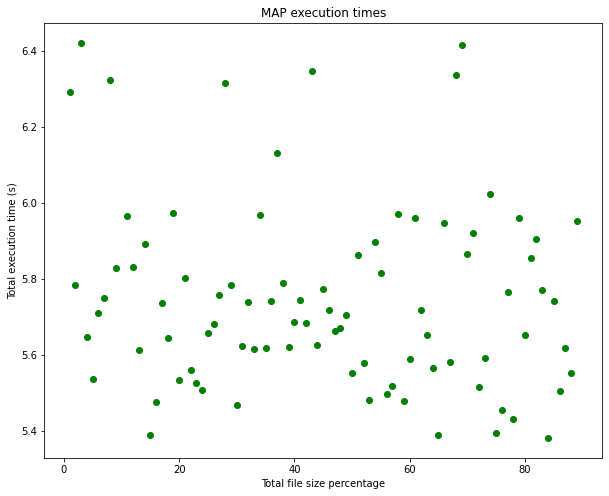

In [6]:
plt.figure(figsize=(10,8))
plt.scatter(x_map, y_map, marker = 'o', color = 'green')

# axis
plt.xlabel('Total file size percentage')
plt.ylabel('Total execution time (s)')

# title
plt.title('MAP execution times')

plt.show()

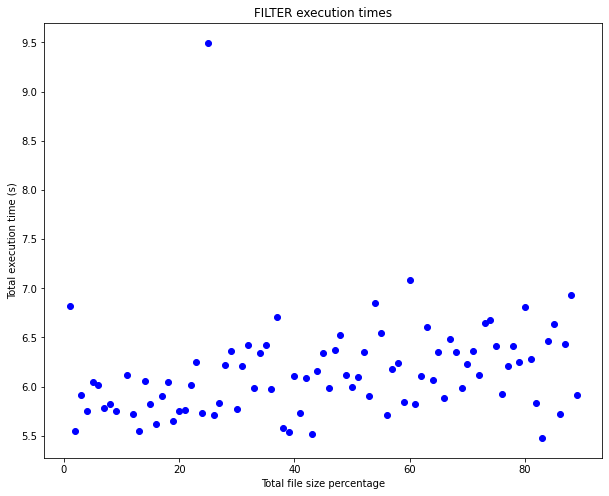

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(x_filter, y_filter, marker = 'o', color = 'blue')

# axis
plt.xlabel('Total file size percentage')
plt.ylabel('Total execution time (s)')

# title
plt.title('FILTER execution times')

plt.show()

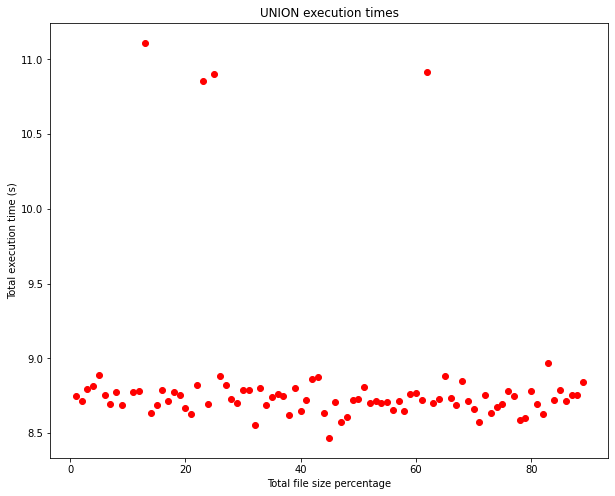

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(x_union, y_union, marker = 'o', color = 'red')

# axis
plt.xlabel('Total file size percentage')
plt.ylabel('Total execution time (s)')

# title
plt.title('UNION execution times')

plt.show()

### 1.2. Box plot.

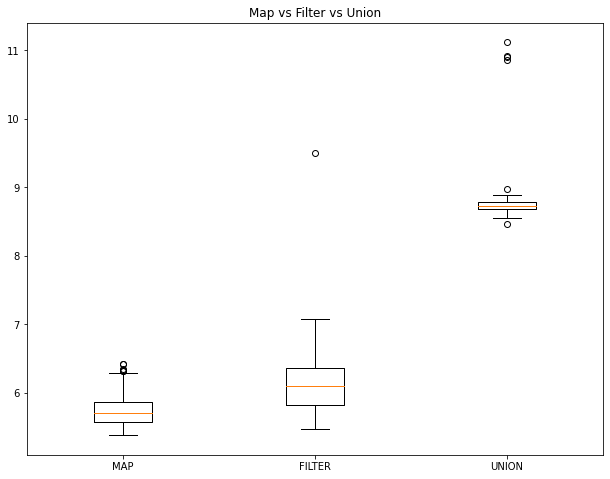

In [9]:
np.random.seed(10)

np_map = y_map.to_numpy()
np_filter = y_filter.to_numpy()
np_union = y_union.to_numpy()
data = [np_map, np_filter, np_union]
 
fig = plt.figure(figsize =(8, 6))
ax = fig.add_axes([0,0,1,1])

bp = ax.boxplot(data)

# x-axis
ax.set_xticklabels(['MAP', 'FILTER','UNION'])
 
# title
plt.title("Map vs Filter vs Union")
 
plt.show()

---

## 2. Wide transformation = distinct / groupbykey / reducebykey

In [10]:
distinct_execution_times = execution_times.loc[execution_times['Transformation'] == 'distinct']
groupbykey_execution_times = execution_times.loc[(execution_times['Transformation'] == 'groupByKey') & (execution_times['App Name'].str.contains('app'))]
reducebykey_execution_times = execution_times.loc[(execution_times['Transformation'] == 'reduceByKey') & (execution_times['App Name'].str.contains('app'))]
x_distinct, y_distinct = distinct_execution_times['Size percentage'], distinct_execution_times['Total app execution time (s)']
x_groupbykey, y_groupbykey = groupbykey_execution_times['Size percentage'], groupbykey_execution_times['Total app execution time (s)']
x_reducebykey, y_reducebykey = reducebykey_execution_times['Size percentage'], reducebykey_execution_times['Total app execution time (s)']

In [19]:
plt.figure(figsize=(10,8))
plt.scatter(x_distinct, y_distinct, marker = 'o', color = 'green')
plt.axline((0,modelo.intercept_), slope=modelo.coef_.flatten()[0], color='black', linewidth=3)

# axis
plt.xlabel('Total file size percentage')
plt.ylabel('Total execution time (s)')

# title
plt.title('DISTINCT execution times')

plt.show()

,App ID,App Name,Total app execution time (s),Size percentage,Transformation
1,app-20230803100518-0401,distinct_app_narrow_transf_gsod_sample_039_1.txt,140.068,39,distinct
4,app-20230803092808-0380,distinct_app_narrow_transf_gsod_sample_017_1.txt,66.169,17,distinct
21,app-20230803095405-0396,distinct_app_narrow_transf_gsod_sample_034_1.txt,124.728,34,distinct
29,app-20230803100741-0402,distinct_app_narrow_transf_gsod_sample_03_1.txt,114.818,30,distinct
41,app-20230803122356-0442,distinct_app_narrow_transf_gsod_sample_07_1.txt,235.666,70,distinct
...,...,...,...,...,...
673,app-20230803092916-0381,distinct_app_narrow_transf_gsod_sample_018_1.txt,71.070,18,distinct
676,app-20230803124800-0447,distinct_app_narrow_transf_gsod_sample_085_1.txt,318.699,85,distinct
688,app-20230803094110-0389,distinct_app_narrow_transf_gsod_sample_027_1.txt,104.612,27,distinct
740,app-20230803120629-0438,distinct_app_narrow_transf_gsod_sample_076_1.txt,242.894,76,distinct


### 1.1. Adjust linear regression models.

In [11]:
# Correlación lineal entre las dos variables
corr_test = pearsonr(x = x_distinct, y =  y_distinct)
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

print('============================== MODELO ===================================')

# Creación del modelo
modelo = LinearRegression()
modelo.fit(X = x_distinct.array.reshape(-1,1), y = y_distinct)


# Información del modelo
print("Pendiente:", modelo.coef_.flatten()[0])
print("Coeficiente:", modelo.intercept_)
print('==============================================================================')
print("Coeficiente de determinación R^2:", modelo.score(x_distinct.array.reshape(-1,1), y_distinct))

Coeficiente de correlación de Pearson:  0.9929599564730515
P-value:  1.547362340016272e-80
============================== MODELO ===================================
Pendiente: 3.2562717505069214
Coeficiente: 13.785374175452716
Coeficiente de determinación R^2: 0.9859694751589642


In [12]:
# Correlación lineal entre las dos variables
corr_test = pearsonr(x = x_groupbykey, y =  y_groupbykey)
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

print('============================== MODELO ===================================')

# Creación del modelo
modelo = LinearRegression()
modelo.fit(X = x_groupbykey.array.reshape(-1,1), y = y_groupbykey)


# Información del modelo
print("Pendiente:", modelo.coef_.flatten()[0])
print("Coeficiente:", modelo.intercept_)
print('==============================================================================')
print("Coeficiente de determinación R^2:", modelo.score(x_groupbykey.array.reshape(-1,1), y_groupbykey))

Coeficiente de correlación de Pearson:  0.9932824158915919
P-value:  5.671529797787954e-88
============================== MODELO ===================================
Pendiente: 3.266702233557721
Coeficiente: 14.530383678394827
Coeficiente de determinación R^2: 0.9866099577194375


In [13]:
# Correlación lineal entre las dos variables
corr_test = pearsonr(x = x_reducebykey, y =  y_reducebykey)
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

print('============================== MODELO ===================================')

# Creación del modelo
modelo = LinearRegression()
modelo.fit(X = x_reducebykey.array.reshape(-1,1), y = y_reducebykey)


# Información del modelo
print("Pendiente:", modelo.coef_.flatten()[0])
print("Coeficiente:", modelo.intercept_)
print('==============================================================================')
print("Coeficiente de determinación R^2:", modelo.score(x_reducebykey.array.reshape(-1,1), y_reducebykey))

Coeficiente de correlación de Pearson:  0.9949572609213669
P-value:  1.0954299910720314e-94
============================== MODELO ===================================
Pendiente: 3.2451409780038833
Coeficiente: 14.462472334719195
Coeficiente de determinación R^2: 0.9899399510601489


### 1.2. Scatter plots.

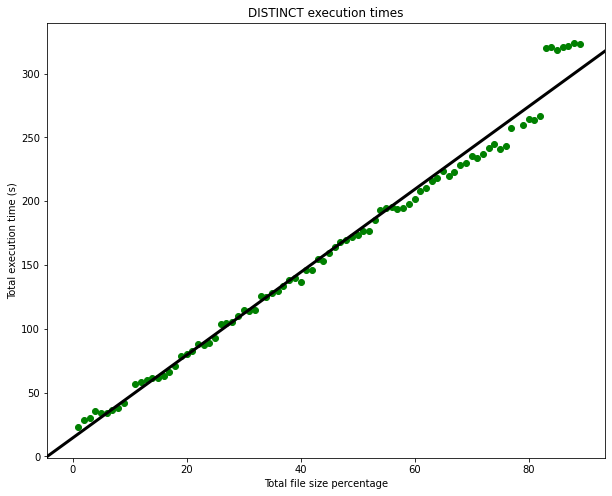

In [14]:
plt.figure(figsize=(10,8))
plt.scatter(x_distinct, y_distinct, marker = 'o', color = 'green')
plt.axline((0,modelo.intercept_), slope=modelo.coef_.flatten()[0], color='black', linewidth=3)

# axis
plt.xlabel('Total file size percentage')
plt.ylabel('Total execution time (s)')

# title
plt.title('DISTINCT execution times')

plt.show()

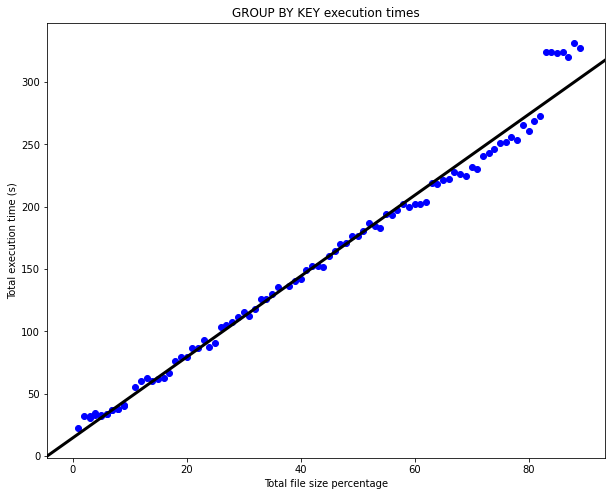

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(x_groupbykey, y_groupbykey, marker = 'o', color = 'blue')
plt.axline((0,modelo.intercept_), slope=modelo.coef_.flatten()[0], color='black', linewidth=3)

# axis
plt.xlabel('Total file size percentage')
plt.ylabel('Total execution time (s)')

# title
plt.title('GROUP BY KEY execution times')

plt.show()

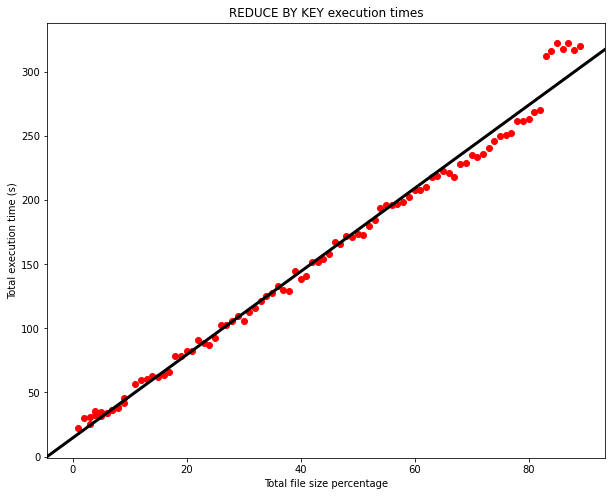

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(x_reducebykey, y_reducebykey, marker = 'o', color = 'red')
plt.axline((0,modelo.intercept_), slope=modelo.coef_.flatten()[0], color='black', linewidth=3)

# axis
plt.xlabel('Total file size percentage')
plt.ylabel('Total execution time (s)')

# title
plt.title('REDUCE BY KEY execution times')

plt.show()

---

### Estudio del salto para ficheros de tamaño >= 80%

In [208]:
df_1 = df.loc[(df['Total Tasks'] != '-') & (df['Total Tasks'] != "1")]
df_1['Total Tasks'] = df_1['Total Tasks'].astype(int)
df_1['Size percentage'] = df_1['App Name'].map(lambda x: int((x.split('_')[-2] + '0')[0:3])).astype(int)
df_distinct = df_1.loc[df_1['App Name'].str.startswith('distinct')]
df_reduce = df_1.loc[df_1['App Name'].str.startswith('reduce')]
df_group = df_1.loc[df_1['App Name'].str.startswith('group')]
x_1 = df_distinct['Size percentage']
y_1 = df_distinct['Total Tasks']
x_2 = df_reduce['Size percentage']
y_2 = df_reduce['Total Tasks']
x_3 = df_group['Size percentage']
y_3 = df_group['Total Tasks']

<ipython-input-208-160f895d580c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Total Tasks'] = df_1['Total Tasks'].astype(int)
<ipython-input-208-160f895d580c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Size percentage'] = df_1['App Name'].map(lambda x: int((x.split('_')[-2] + '0')[0:3])).astype(int)


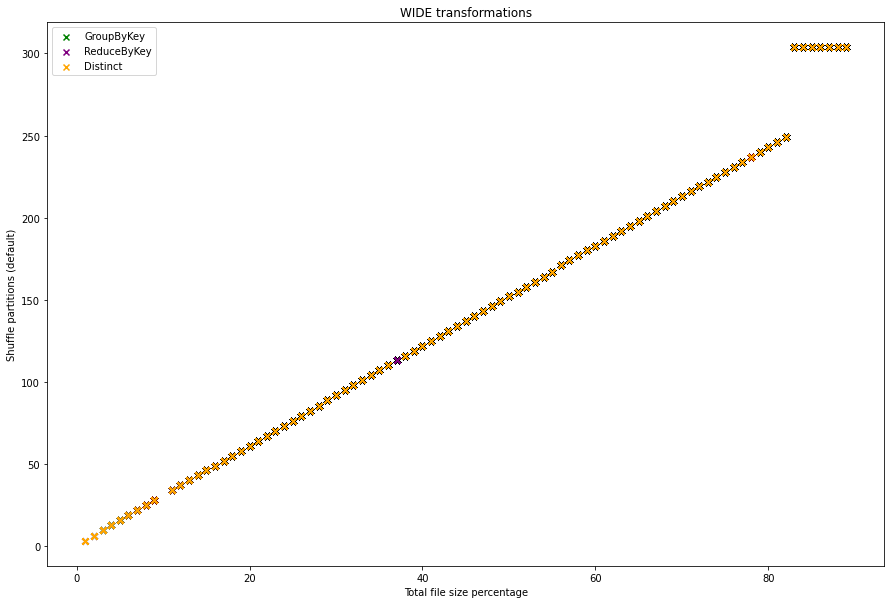

In [220]:
plt.figure(figsize=(15,10))
plt.scatter(x_1, y_1, marker = 'x', color = 'green')
plt.scatter(x_2, y_2, marker = 'x', color = 'purple')
plt.scatter(x_3, y_3, marker = 'x', color = 'orange')

#legend
plt.legend({'Distinct', 'ReduceByKey', 'GroupByKey'})
plt.xlabel('Total file size percentage')
plt.ylabel('Shuffle partitions (default)')

# title
plt.title('WIDE transformations')

plt.show()

---